In [2]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [3]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

/opt/anaconda3/envs/env-01/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url,stream=True).raw).convert('RGB')

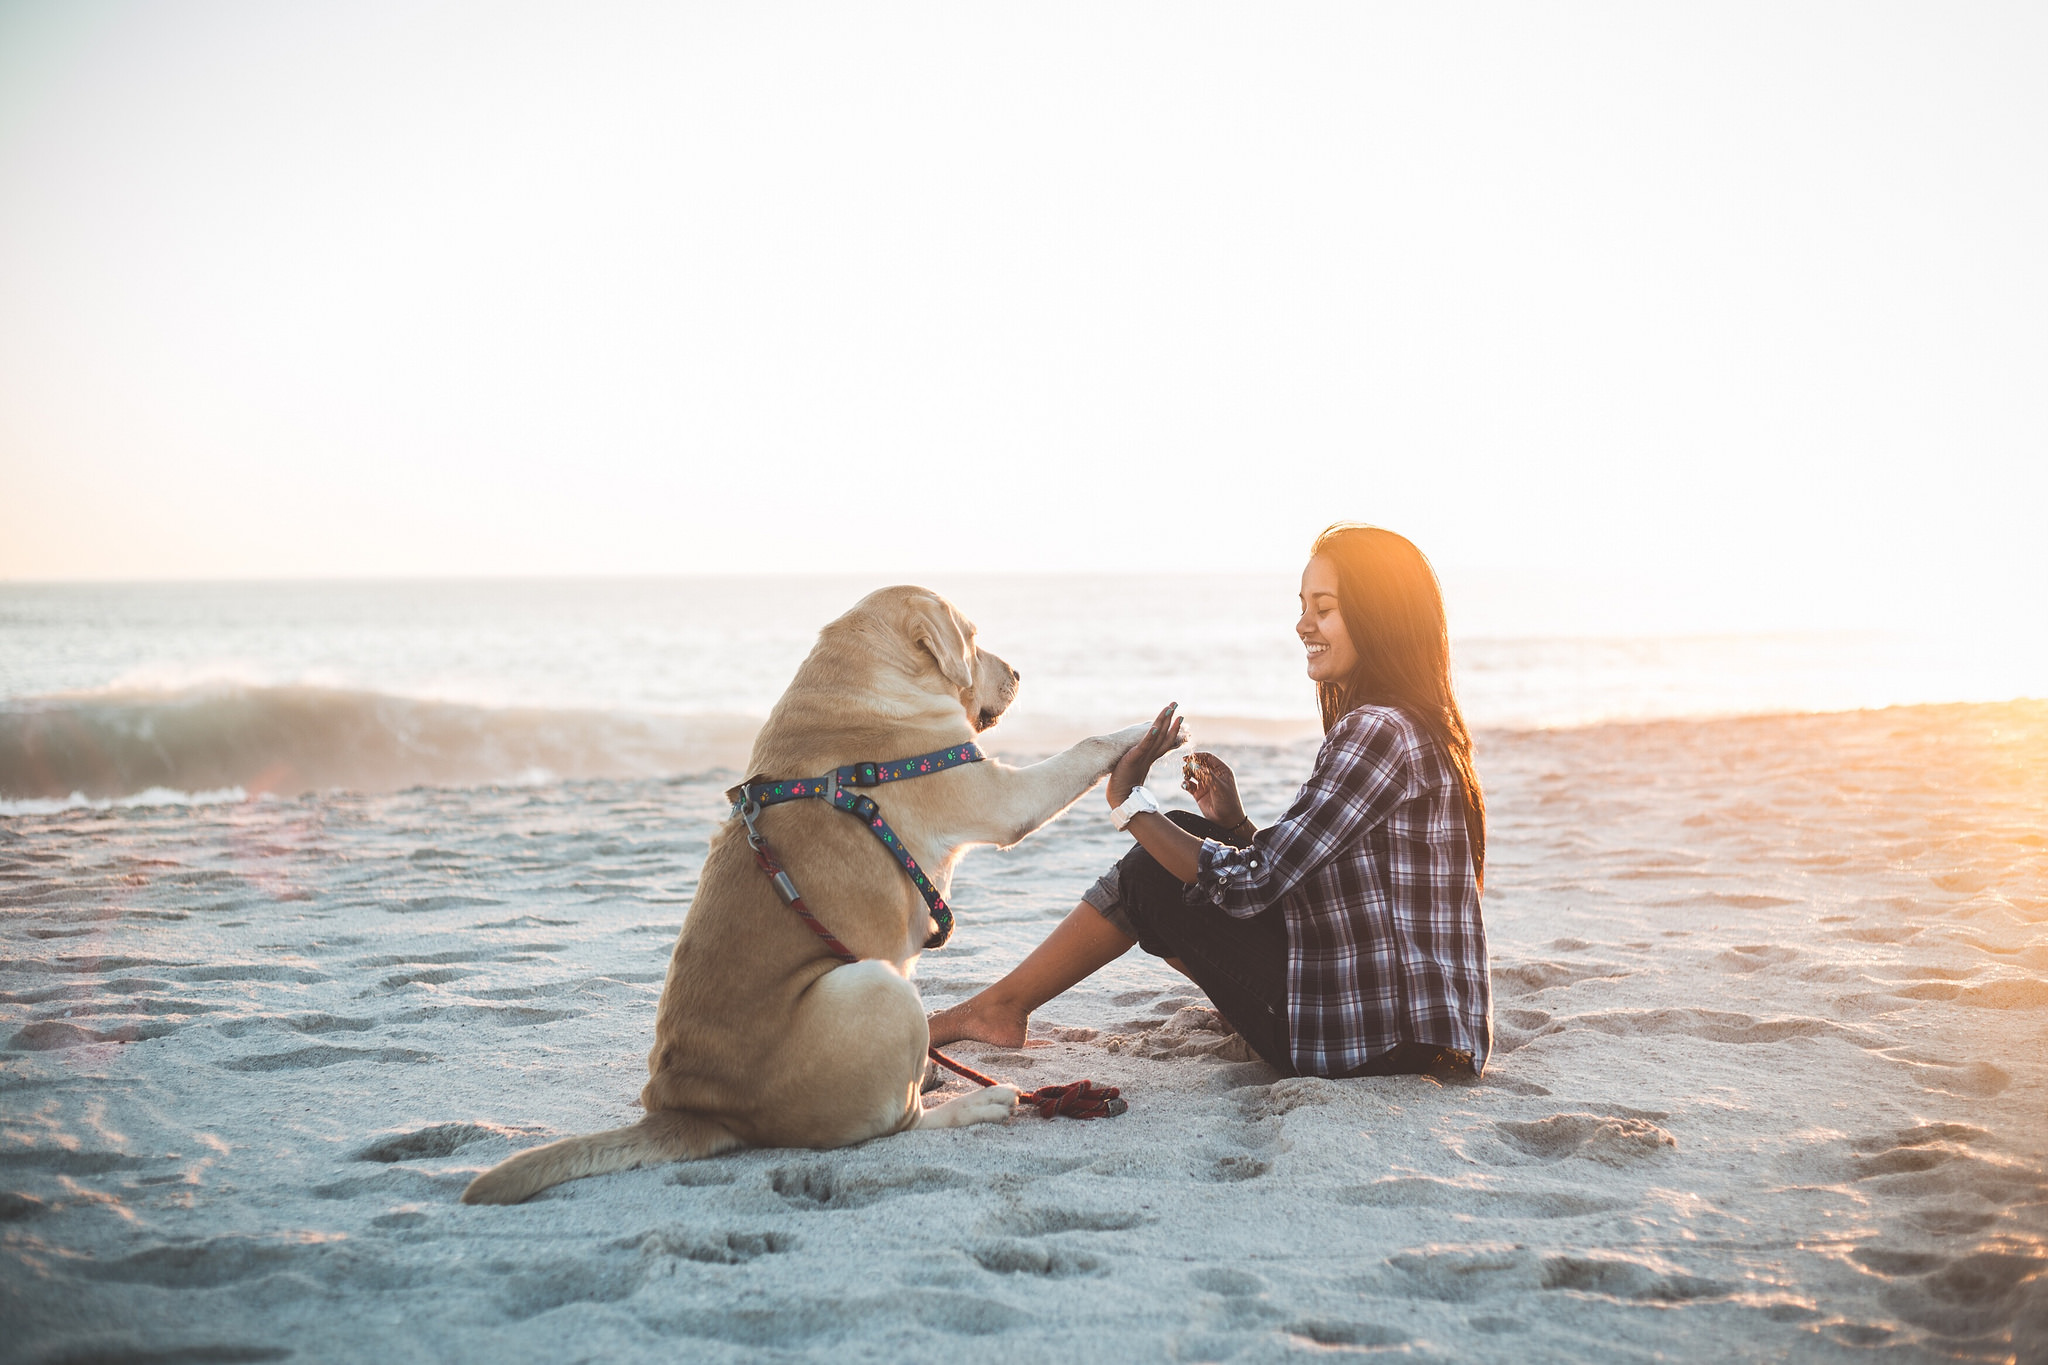

In [29]:
raw_image

**conditional Image Captioning**

In [15]:
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

In [16]:
inputs

{'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.9753],
          [ 1

In [17]:
out = model.generate(**inputs)

/opt/anaconda3/envs/env-01/lib/python3.12/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [18]:
out

tensor([[30522,  1037,  5855,  1997,  1037,  2450,  1998,  2014,  3899,  2006,
          1996,  3509,   102]])

In [19]:
out_decode = processor.decode(out[0], skip_special_tokens = True)

In [20]:
out_decode

'a photography of a woman and her dog on the beach'

**unconditional image captioning**

In [23]:
inputs_unc = processor(raw_image, return_tensors="pt")

In [24]:
inputs_unc

{'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.9753],
          [ 1

In [25]:
out_unc = model.generate(pixel_values=inputs_unc['pixel_values'])

/opt/anaconda3/envs/env-01/lib/python3.12/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [26]:
out_unc

tensor([[30522,  2450,  3564,  2006,  1996,  3509,  2007,  2014,  3899,  1998,
          1037,  3526,  3042,   102]])

In [27]:
out_unc_decode = processor.decode(out_unc[0], skip_special_tokens = True)

In [28]:
out_unc_decode

'woman sitting on the beach with her dog and a cell phone'

**Infer on img from device**

In [39]:
raw_image_ric = Image.open("../../../../../Users/meg/Desktop/danny ric.png")

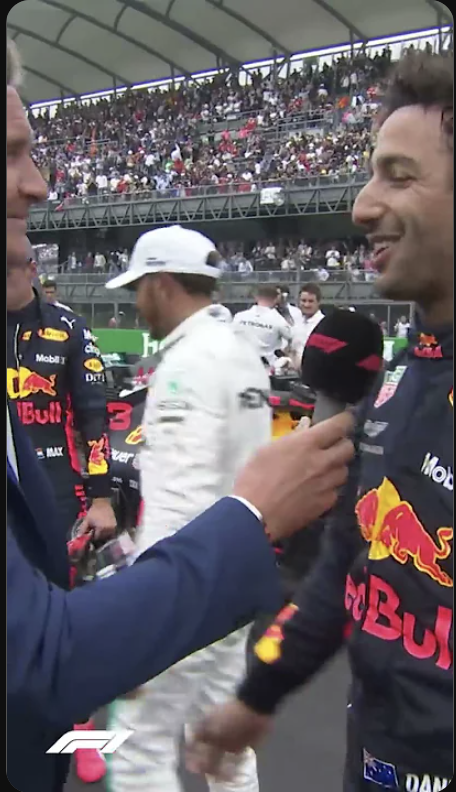

In [40]:
raw_image_ric

In [41]:
inputs_ric = processor(raw_image_ric, return_tensors="pt")

In [42]:
inputs_ric

{'pixel_values': tensor([[[[-1.5733, -1.5733, -1.5733,  ..., -1.5733, -1.5733, -1.5733],
          [-1.5733, -1.5733, -1.5733,  ..., -1.5733, -1.5733, -1.5733],
          [-1.5733, -1.5733, -1.5733,  ..., -1.5733, -1.5733, -1.5733],
          ...,
          [-1.5733, -1.5733, -1.5733,  ..., -1.5733, -1.5733, -1.5733],
          [-1.5733, -1.5733, -1.5733,  ..., -1.5733, -1.5733, -1.5733],
          [-1.5733, -1.5733, -1.5733,  ..., -1.5733, -1.5733, -1.5733]],

         [[-1.5270, -1.5270, -1.5270,  ..., -1.5270, -1.5270, -1.5270],
          [-1.5270, -1.5270, -1.5270,  ..., -1.5270, -1.5270, -1.5270],
          [-1.5270, -1.5270, -1.5270,  ..., -1.5270, -1.5270, -1.5270],
          ...,
          [-1.5270, -1.5270, -1.5270,  ..., -1.5270, -1.5270, -1.5270],
          [-1.5270, -1.5270, -1.5270,  ..., -1.5270, -1.5270, -1.5270],
          [-1.5270, -1.5270, -1.5270,  ..., -1.5270, -1.5270, -1.5270]],

         [[-1.2669, -1.2669, -1.2669,  ..., -1.2669, -1.2669, -1.2669],
          [-1

In [43]:
out_ric = model.generate(**inputs_ric)

/opt/anaconda3/envs/env-01/lib/python3.12/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [45]:
out_ric

tensor([[30522,  1037, 27528,  2098,  3746,  1997,  1037,  2158,  1999,  1037,
          4848,  1998,  5495,  3331,  2000,  1037,  2158,  1999,  1037,  4848]])

In [44]:
out_ric_decode = processor.decode(out_ric[0], skip_special_tokens = True)

In [46]:
out_ric_decode

'arafed image of a man in a suit and tie talking to a man in a suit'